<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_04/Lecture_02/SOLUTION_Advanced_Visualizations_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Advanced Visualizations with Python 🎨

- 02/18/22
- 01.24.22 Cohort

### 🗂 Table of Contents 
<a name="contents"></a>

- ☁️ [Working with Google Drive with Python](#gdrive)
    - Saving google drive folder paths in variables
    - Using the `os` module for file management
    - Links to Dataset
- 🏠 [Task #1: Ames Housing Revisited](#task1):
    - Formatting Tick Labels 
    - Customizing fonts 
    - Matplotlib styles
    - Saving to Google Drive
- 🦸 [Task #2: Super Hero Powers](#task2)🦸‍♀️:
    - Precise/Selective Coloring of Bars
    - Loops through lists, using filters, etc.

- [Appendix](#Appendix)
    - Seaborn Palettes
    - Subplots of Different Sizesa
    - Annotating bar values



## Learning Objectives

> Today we are going to focus on examples of advanced and more complex visualization construction with matplotlib/pandas/seaborn.

- Instead of a single-dataset-driven activity, we are going to use several datasets to demonstrate different visualizations tasks/tweaks.





### Previously Promised in Class



- [x] Formatting ticks - location and text formatting
- [x] Matplotlib styles/seaborn themes
- [x] Font customization (titles/axis labels, etc)
- [x] Figures with multiple subplots
    - [x] Multiple subplots with DIFFERENT figure sizes.
- [x] Saving/exporting figures (programatically)




### Requested


- [x] Review loading and saving files to Google Drive.


- [x] Using lists to iterate through the custom creation of Subplots; data frames, filters, colors, labels etc



- [x] OOP Syntax and Using Axes



- [x] Selective removal of frame/spines



## Datasets/Files Used Today

### Google Drive Data Folder to Save

- 💾 All data files used today are stored in [this Google Drive folder](https://drive.google.com/drive/folders/10O96wCNedDmmuKaO_NBc5rsNCUoiLuXs?usp=sharing).
    - You will want to click the add to google drive button on the top right.
    - or you can download the files locally and then add to colab/drive.


### Original Sources
- Super Heroes Dataset: https://www.kaggle.com/claudiodavi/superhero-set
    - Files:
        - `heroes_information.csv`
        - `super_hero_powers.csv`

- Ames Housing Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    - Files:
        - Kaggle file name: `train.csv`
        - renamed to `ames-train.csv`


# ☁️ Working with Folders and Stored Files **with Python** <a name="gdrive"></a> 
- 🗂[Click to jump to ToC](#contents)


## Using Google Drive - with Python



### Mounting Google Drive



- When I click the Mount google drive button on the Files sidebar, I always hit `Cancel`, which automatically inserts the following cell of code.
```python
from google.colab import drive
drive.mount('/content/drive')
```


- If you uploaded new files on Google Drive's website, you may need to reload the contents of your drive in Colab. 
    - To Do so, add `force_remount=True`
```python
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
```



### Saving Filepaths as Variables


- I have all of my bootcamp materials saved on google drive in a "`DS-Bootcamp`" folder.

- My data files are stored in on gdrive in the following "`Data`" folder:
    - `My Drive` > `DS-Bootcamp` > `Data`

- **I may want to save files back to Google Drive, somewhere inside by `Ds-Bootcamp` folder.**
    - So I am going to mount google drive sand **save the filepath for it as `BASE_FOLDER`**
        - Tip: I  always make sure that I include a `/` at the END of my folder name, that way I can combine it with file names later.
        - `BASE_FOLDER = '/content/drive/MyDrive/DS-Bootcamp/' `

    - I also will make a `DATA_FOLDER` variable to make it easier to access the numerous files we will be loading today. 
        - `DATA_FOLDER = BASE_FOLDER+"Data/"`


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
## saving filepath variables
BASE_FOLDER = '/content/drive/MyDrive/DS-Bootcamp/'
DATA_FOLDER = BASE_FOLDER+"Data/"

## Using the `os` module for managing files and folders

#### Getting Folder Contents

- Python has a builtin module called `os` that has lots of helful functions for working with files and folders. 

- To check the contents of the current folder:
```python
os.listdir() # list directory contents
```
    - The current folder is Colab's virtual hard drive, NOT google drive!
    

In [ ]:
## import module
import os

##  check current folder
os.listdir()

['.config', 'drive', 'sample_data']



- **To check the contents of a different folder**, just provide the folder path as an argument
```python
os.listdir(DATA_FOLDER) # list directory contents
```

- To sort the file names alphabetically, pass the above code into the `sorted` function.
```python
sorted(os.listdir(DATA_FOLDER)) # list directory contents
```


In [ ]:
## get list of folders/files in DATA_FOLDER
sorted(os.listdir(DATA_FOLDER))

['ames-train.csv', 'heroes_information.csv', 'super_hero_powers.csv']

In [ ]:
## get list of folders/files in my BASE_FOLDER
sorted(os.listdir(BASE_FOLDER))

['Data',
 'Week_01',
 'Week_02',
 'Week_03',
 'Week_04',
 'Week_05',
 'Week_06',
 'Week_07',
 'Week_08',
 'Week_09',
 'Week_10',
 'Week_11',
 'Week_12',
 'Week_13',
 'Week_14',
 'Week_15',
 'Week_16']

In [ ]:
## get list of folders/files in Week_04
sorted(os.listdir(BASE_FOLDER+'Week_04/'))

['Assignments', 'Lecture_01', 'Lecture_02', 'Notes']

#### Creating New Folders

- I want to create a new folder called "Advanced Visualizatinons" inside of the "`Week_04/Lecture_02/`" folder we see above.


- `os.makedirs` function will create the folders for whatever filepath you provide. It needs the new folder to create as a string



- To verify I made my folder path correctly,I can save it as a variable FIRST and then use that variable to make the folder and then check its contents.
```python 
new_folder = BASE_FOLDER+'Week_04/Lecture_02/Advanced_Visualizations/'
print(new_folder)
```

- If the file path looks correct (make sure no missing "/"), then create the folder with `os.makedirs`:
```python
os.makedirs(new_folder,exist_ok=True)
```

    - adding `exist_ok=True` will prevent errors if the folder already exists
    ```python
     os.makedirs(BASE_FOLDER+'Week_04/Lecture_02/Advanced_Visualizations/',exist_ok=True
    ```


In [ ]:
# checking new folder name
new_folder = BASE_FOLDER+'Week_04/Lecture_02/Advanced_Visualizations/'
new_folder

'/content/drive/MyDrive/DS-Bootcamp/Week_04/Lecture_02/Advanced_Visualizations/'

In [ ]:
## Creating the new folder
os.makedirs(new_folder,exist_ok=True)

In [ ]:
## Checking that I can get list of files in new folder
sorted(os.listdir(new_folder)) # --> this would error if folder didn't exist

['Top 10 Tallest Heroes with Power of Accelerated Healing.png',
 'Top 10 Tallest Heroes with Power of Agility.png',
 'Top 10 Tallest Heroes with Power of Durability.png',
 'Top 10 Tallest Heroes with Power of Energy Blasts.png',
 'Top 10 Tallest Heroes with Power of Flight.png',
 'Top 10 Tallest Heroes with Power of Intelligence.png',
 'Top 10 Tallest Heroes with Power of Reflexes.png',
 'Top 10 Tallest Heroes with Power of Stamina.png',
 'Top 10 Tallest Heroes with Power of Super Speed.png',
 'Top 10 Tallest Heroes with Power of Super Strength.png',
 'home-prices-in-ames.png']

- Okay great! No files is ok, because we just created this folder!
    - If the folder didn't exist, we would have received an error message.
- Now we are ready to start working with our numerous data files and to save our results back to Google Drive!

# 🏠 Task #1 - House Price Insights for Ames, Iowa <a name="task1"></a>
- [🗂Click to jump to ToC](#contents)



<img src="https://www.brickunderground.com/sites/default/files/styles/blog_primary_image/public/blog/images/080818_desmoinesmain.jpg" width=50%>

- A home owners association from Ames, Iowa has hired us to provide some insights on the prices of homes in the area.  They have provided us with some data on house sales in the region, as well as a list of questions they'd like answered.

- We will therefore use the appropriate visualizations to answer their questions in visual-form.


### Imports and Checking Versions of Packages

In [ ]:
## Our usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Notice the extra matplotlib import!
import matplotlib as mpl


## Printing the current version of these packages in Colab
print('- Package Versions:')
print(f'\tMatplotlib = {mpl.__version__}')
print(f'\tPandas = {pd.__version__}')
print(f'\tSeaborn = {sns.__version__}')

- Package Versions:
	Matplotlib = 3.2.2
	Pandas = 1.3.5
	Seaborn = 0.11.2


### The Questions to Answer

1. What is the distribution of house prices in Ames, Iowa?
    - What does the full distribution of homes look like?
    - Are there any homes that are outliers, in terms of their price? 
    
2. What is the relationship between square footage of the living area (`GrLivArea`)  and sale price (`SalePrice`)?
    
2. What is the average sale price for each of the different types of homes (BldgType)?

### Distribution of House Prices + Outliers 

In [ ]:
## load the ames-train.csv file into a df
df = pd.read_csv(DATA_FOLDER+'ames-train.csv',index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [ ]:
## Keeping a subset of features
cols_to_use = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 
          'OverallQual', 'LotArea', 'SalePrice','BldgType']
df = df[cols_to_use].copy()
df

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice,BldgType
Id,,,,,,,,,,,,,
1,2008,2,0,8,1710,2,2003,2003,5,7,8450,208500,1Fam
2,2007,5,1,6,1262,2,1976,1976,8,6,9600,181500,1Fam
3,2008,9,1,6,1786,2,2002,2001,5,7,11250,223500,1Fam
4,2006,2,1,7,1717,1,1970,1915,5,7,9550,140000,1Fam
5,2008,12,1,9,2198,2,2000,2000,5,8,14260,250000,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2007,8,1,7,1647,2,2000,1999,5,6,7917,175000,1Fam
1457,2010,2,2,7,2073,2,1988,1978,6,6,13175,210000,1Fam
1458,2010,5,2,9,2340,2,2006,1941,9,7,9042,266500,1Fam


In [ ]:
## super-quick null value and datatype check
print("- Null Values:",df.isna().sum(),'\n',sep='\n')
df.info()

- Null Values:
YrSold          0
MoSold          0
Fireplaces      0
TotRmsAbvGrd    0
GrLivArea       0
FullBath        0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
LotArea         0
SalePrice       0
BldgType        0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YrSold        1460 non-null   int64 
 1   MoSold        1460 non-null   int64 
 2   Fireplaces    1460 non-null   int64 
 3   TotRmsAbvGrd  1460 non-null   int64 
 4   GrLivArea     1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   YearRemodAdd  1460 non-null   int64 
 7   YearBuilt     1460 non-null   int64 
 8   OverallCond   1460 non-null   int64 
 9   OverallQual   1460 non-null   int64 
 10  LotArea       1460 non-null   int64 
 11  SalePrice     1460 non-null   int64 
 12  BldgType      1460 non-null   object

##### Revisiting Our Visualization from Week 03, Lecture 01

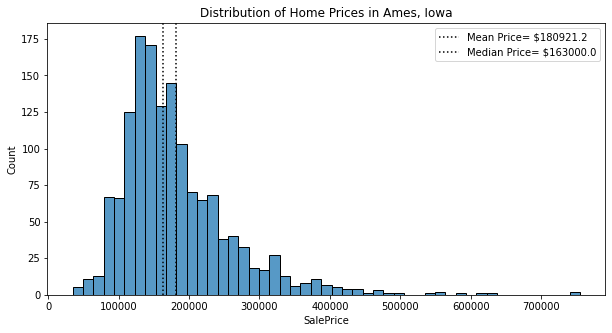

In [ ]:
## FROM WEEK 03, LECTURE 01

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='SalePrice', ax=ax)
ax.set(title='Distribution of Home Prices in Ames, Iowa');

## Annotating mean and median
mean_price = df['SalePrice'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['SalePrice'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

#### 🕹 Python String Format Specifiers/Code


- To get 2-digit prices for our mean and median, we *can*  use the round function to round to 2 digits 

```python
## save mean
mean_price = df["SalePrice"].mean()

## Add vertical line with mean in the label
ax.axvline(mean,label= f'Mean Price= ${round(mean_price,2)}')
```

- BUT the better way is to use python string formatting to customize how the number appears.
    - Inside our f'strings curly brackets, after the variable we want to print, we will add a `:` followed by a special format code (see reference below).
        - Using ".2f" would make our float (decimal value) only display 2 decimal places.
            - `{mean:.2f}`
        - The line of code would look like:
```python
ax.axvline(mean,label= f'Mean Price= ${mean_price:.2f}')
```

- Just by adding a `,` to our format code, we can have pyhton add `,`'s as thousands separators (example: `100,000`)
    - Put together, our format code would be:
        - - `{mean:,.2f}`

- Additional Resources:
    - [Tutorial: String Formatting](https://www.w3schools.com/python/ref_string_format.asp)
    - [Reference Table: String Format Codes](https://mkaz.blog/code/python-string-format-cookbook/)





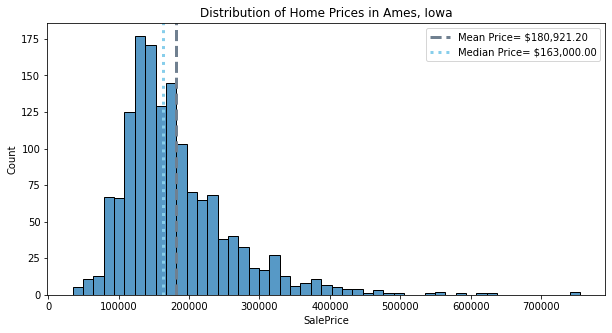

In [ ]:
## Paste our visualization code, but use string formatting instead of rounding


## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df,x='SalePrice',ax=ax)
ax.set_title('Distribution of Home Prices in Ames, Iowa');


## Annotating mean and median
mean_price = df['SalePrice'].mean()
ax.axvline(mean_price,color='slategray', ls='--', lw=3,
           label=f"Mean Price= ${mean_price:,.2f}");

med_price = df['SalePrice'].median()
ax.axvline(med_price,color='skyblue', ls=':', lw=3,
           label=f"Median Price= ${med_price:,.2f}");
ax.legend();

In [ ]:
## functionize the above plot and call it plot_dist

def plot_dist(data,x='SalePrice',figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=df,x=x,ax=ax)
    ax.set_title('Distribution of Home Prices in Ames, Iowa');


    ## Annotating mean and median
    mean_price = df[x].mean()
    ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = ${mean_price:,.2f}");

    med_price = df[x].median()
    ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = ${med_price:,.2f}");
    ax.legend();
    return fig,ax

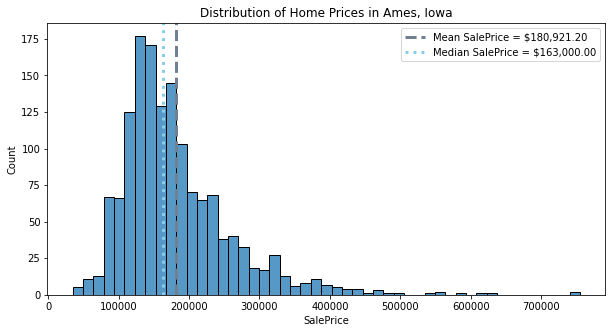

In [ ]:
## test out our function to verify result
fig, ax = plot_dist(df)

- What if we wanted our SalePrice ticks to look as good as our legend values?

### 📚 Customizing Tick Formatting

- [Tick Formatters Examples](https://matplotlib.org/stable/gallery/ticks_and_spines/tick-formatters.html)
    - [**Reference: String Format Codes**](https://mkaz.blog/code/python-string-format-cookbook/)
- [Tick Locator Examples](https://matplotlib.org/stable/gallery/ticks_and_spines/tick-locators.html)


- We will use the `StrMethodFormatter` which uses python string format codes to change the tick laebl text.



- Let's make our price ticks look more professional
    - Add $'s 
    - Add , separator for thousands
    - Show 2 decimal places
    
- [Tutorial Example](https://matplotlib.org/stable/gallery/pyplots/dollar_ticks.html?highlight=tick)

#### 🕹 Using StrMethodFormatter

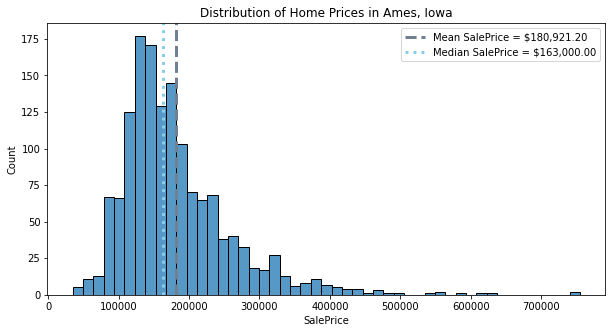

In [ ]:
## Make price_fmt using the StrMethodFormatter and the appropriate format code 
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.2f}')

## Get the fig and ax from our function
fig,ax = plot_dist(df)

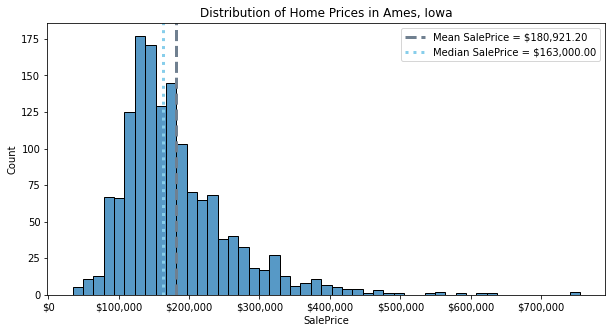

In [ ]:
## Now, use the ax.xaxis.set_major_formatter method 
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(price_fmt)

## Display fig again
fig

#### Using the `FuncFormatter` to Converting "\$700,000" Dollars to "\$700K"

- Example: How to use the FuncFormatter to convert \\$'s to millions of \\$'s.
- To use the Function Formatter:
    - Create a function that accepts 2 arguments: `x` and `pos`
    - Use f-strings and format codes to specify how to change x. 
    - e.g. `f"${x*1e-6:,}M"` would convert "2,000,000" -> "$2M"


```python
from matplotlib.ticker import FuncFormatter

def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,0f}K"

# Create the formatter
price_fmt_mill =FuncFormatter(hundred_k)

## Set the axis' major formatter
ax.xaxis.set_major_formatter(price_fmt_mill)
```

In [ ]:
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}K"

# exxample, just using 0 for pos to run function to test
hundred_k(700000,0)

'$700K'

In [ ]:
from matplotlib.ticker import FuncFormatter
price_fmt_100k = FuncFormatter(hundred_k)

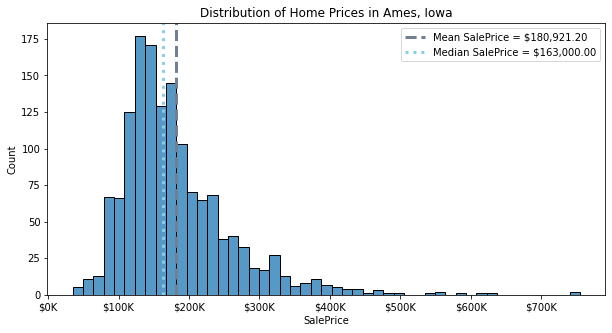

In [ ]:
## Get a new fig from plot_dist and use the new FuncFormatter for price
fig, ax = plot_dist(df)
ax.xaxis.set_major_formatter(price_fmt_100k)

#### `𝑓` Updating our Function with (optional) Tick Formatting

In [ ]:
## Creating a BETTER version of our function with fancy price ticks
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}K"


def plot_dist(data,x='SalePrice',figsize=(10,5),format_price=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=df,x=x,ax=ax)
    ax.set_title('Distribution of Home Prices in Ames, Iowa');


    ## Annotating mean and median
    mean_price = df[x].mean()
    ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = ${mean_price:,.2f}");

    med_price = df[x].median()
    ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = ${med_price:,.2f}");
    ax.legend();


    ## if format_price is True use our FuncFormatter
    if format_price:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    return fig,ax

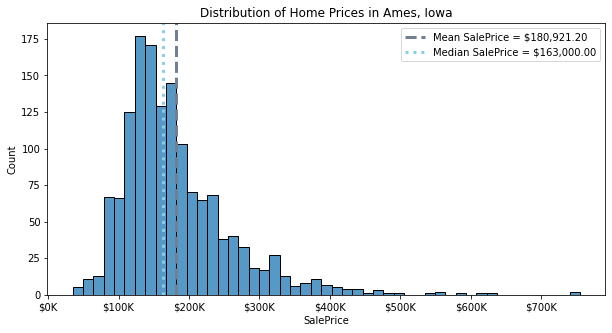

In [ ]:
plot_dist(df);

## 📚 Customizing Fonts

- Multiple options, of varying ease-of-use and power:
    1. Specifying individual font properties when adding text.
    2. Changing the default values for all matplotlib fonts
    3. Using seaborn to scale fonts with sns.set_context
    4. Using a matplotlib style with larger text

- Additional Resources: 
    - [4-different methods for changing the font size](https://towardsdatascience.com/4-different-methods-for-changing-the-font-size-in-python-seaborn-fd5600592242)

### 1) Specifying individual font properties when adding text



- Anything that the Text class in Matplotib accepts can be added to `plt.title/ax.set_title`, as well as for all labels,  ticks, and axis labels.
- [Text class - Matplotlib](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text)
    - Examples Text properties:
        - fontweight: 
            - either as a numeric value in range 0-1000
            - or one of these:
                - 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}`
        - fontsize: either the number of pt to use or one of  `{'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}`
        - fontfamily
        - color
- This approach is 100% valid, but can get tedious if you want to scale all of the fonts for every piece of text, including tick labels




- Tip: When you want to change the font of text elements (axis labels, tick labels)  without changing the actual labels, we can use the OOP syntax and `get` and `set` methods.
    - Example changing xticklabels withh
        - `ax.set_xticklabels()` + `ax.get_xticklabels()` 
```python
# example rotating xticklabels with OOP
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
```
    - Example changing axis labels:
        - `ax.xaxis.get_label()` return the Text object
        - Adding `get_text()` will retrieve JUST the text values that we want to use.
```python
## Increasing Axis Label Font Sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='xx-large')
```



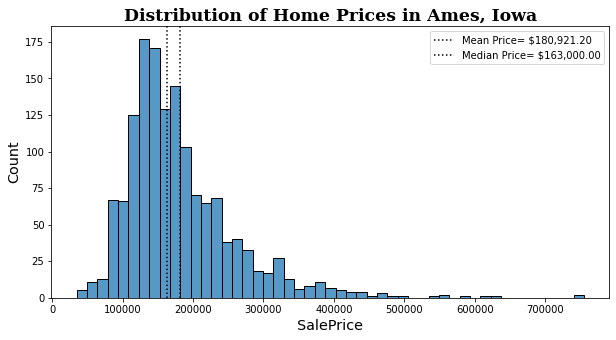

In [ ]:
## Paste our original non-functionized viz code
# increase title font size, bold it, and make serif font


## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df,x='SalePrice',ax=ax)
ax.set_title('Distribution of Home Prices in Ames, Iowa', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');


## Annotating mean and median
mean_price = df['SalePrice'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${mean_price:,.2f}",);

med_price = df['SalePrice'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Price= ${med_price:,.2f}");


## Increasing Axis Label Font Sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')

# ax.xaxis.label()
ax.legend();

### 2) Updating plt.rcParams

- `plt.rcPrams` is a dictionary of all of the default settings for all of matplotlib.
    - Text properties
    - Colors
    - Line widths
    - etc

- We can change individual params by replacing the value stored in the dictionary. 
    - All font params start with `font.`
```python
plt.rcParams['font.family'] = 'serif
```

- If we have many params to update, we can use the dictionary .update method to change multiple params.
```python
plt.rcParams.update( {'font.family':'serif',
                    'font.size':'xx-large',
             'font.weight':'semibold'}
```

In [ ]:
## Saving the current params as default_params,in case I want to un-do
default_params = plt.rcParams.copy()
# default_params

In [ ]:
# plt.rcParams['axes.labelsize'] = 16#'x-large'

In [ ]:
## Updating rcParams  with the same font params that we used 
plt.rcParams.update( {'font.family':'serif',
                    #   'figure.figsize':[15,20],
                    #   'font.size':'xx-large', #not all options for Text are options here
             'font.weight':'bold'})

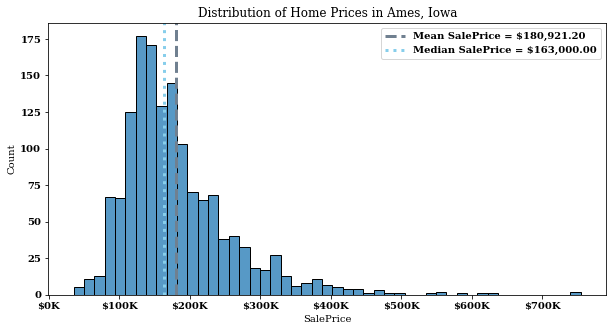

In [ ]:
## Use our function to see the change
plot_dist(df);

In [ ]:
## resetting rcParams values to defaults that we saved
plt.rcParams.update(default_params)

/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


#

### 3) Using seaborn to scale fonts with sns.set_context

- Seaborn has a `sns.set_context` function which is designed to change the default visualization sizes to be more appropriate for whatever context the figure will be displayed.
    - Contexts:
        - `'talk'`: powerpoint presentations
        - `'poster'`: large printed posters for conferences
        - `'paper'`: for printing standard letter-sized paper
        - `'notebook'`: for a jupyter/colab notebook
- sns.set_context examples:
    - https://datavizpyr.com/seaborn-set_context-to-adjust-size-of-plot-labels-and-lines/

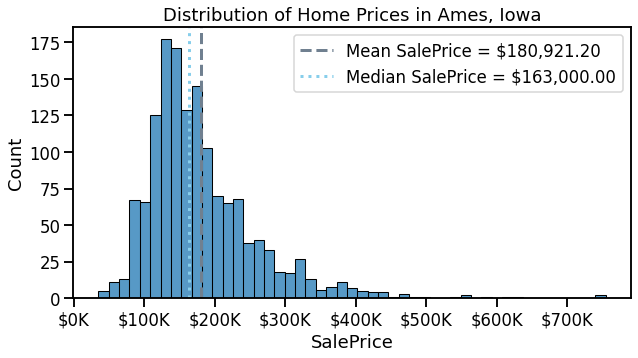

In [ ]:
## test a seaborn context 
sns.set_context('talk')
plot_dist(df);

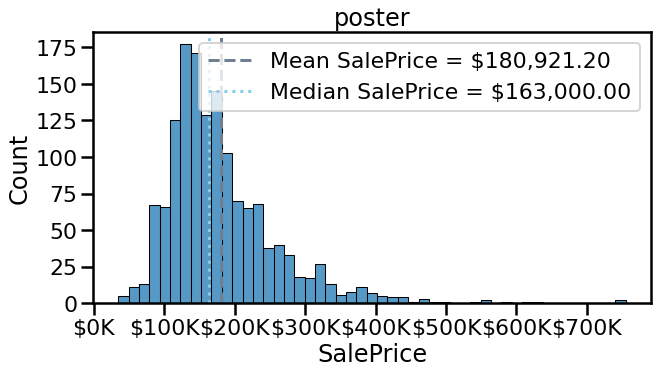

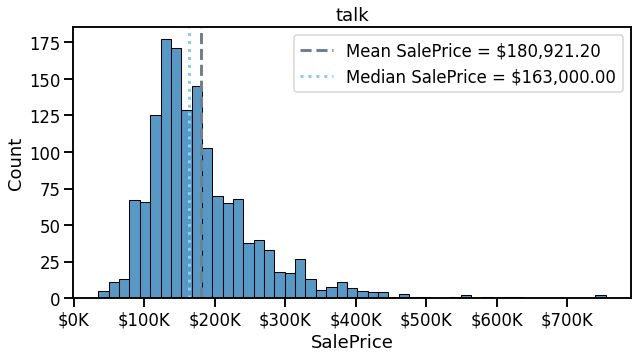

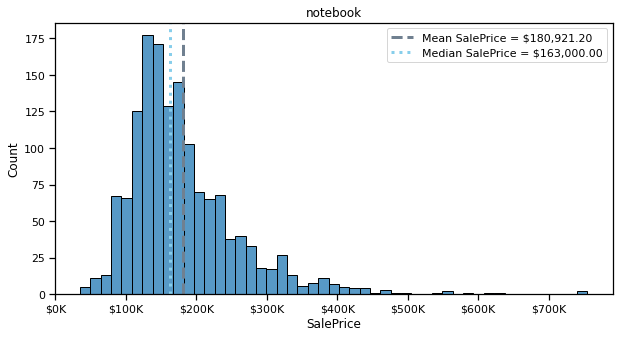

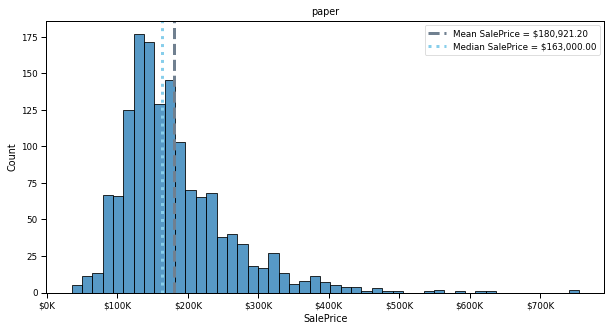

In [ ]:
## comparing all 4 contexts
for context in ['poster','talk','notebook','paper']:

    # set context
    sns.set_context(context)

    # generate plot, change title to be style name
    fig,ax = plot_dist(df)
    ax.set_title(context)
    fig.show()

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17649fa50>)

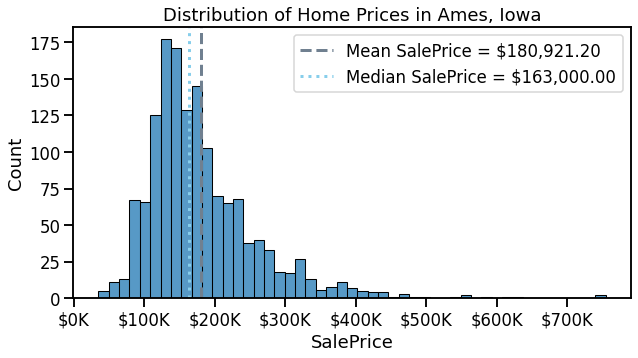

In [ ]:
# choosing final context
sns.set_context('talk')

plot_dist(df)

### 4) Using a matplotlib style to overhaul the default text and theme

- Quick & Easy Visual Overhaul 
- List of Styles Available:
    - `plt.style.available`
    - Examples: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

- To use a style permanently:
    - let's say we wanted to use 'ggplot'
    ```python
    plt.style.use("ggplot")
    ```
    
- To use a style temporarily, we will use a `with` statement (works kind of like an "if" statment)
    ```python
    with plt.style.context('ggplot'):
        fig, ax = plt.subplots()
        ax.scatter(...etc...
    ```


#### 🕹Matplotlib Styles


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


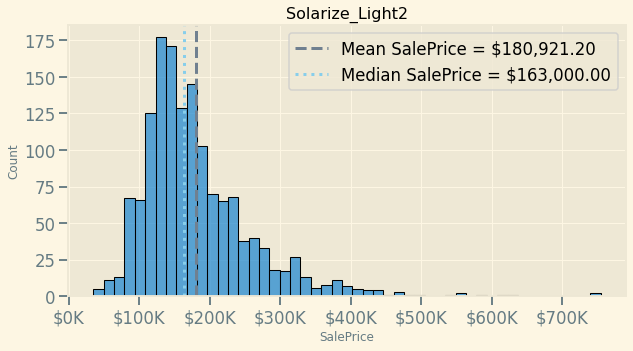

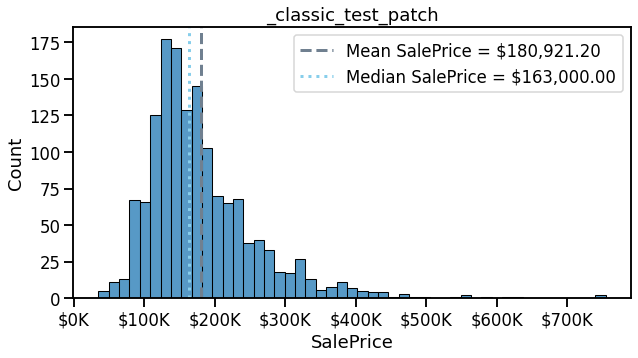

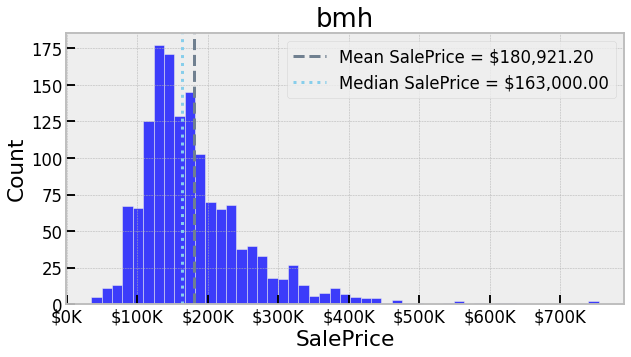

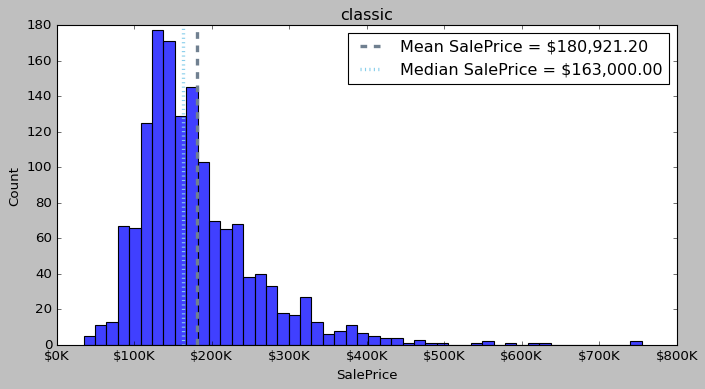

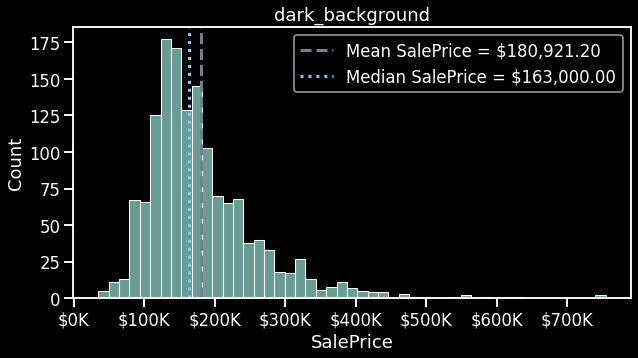

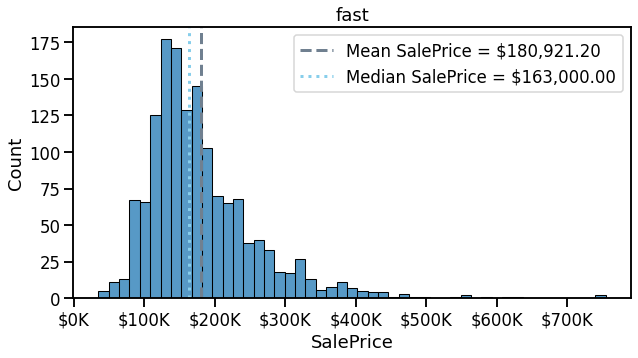

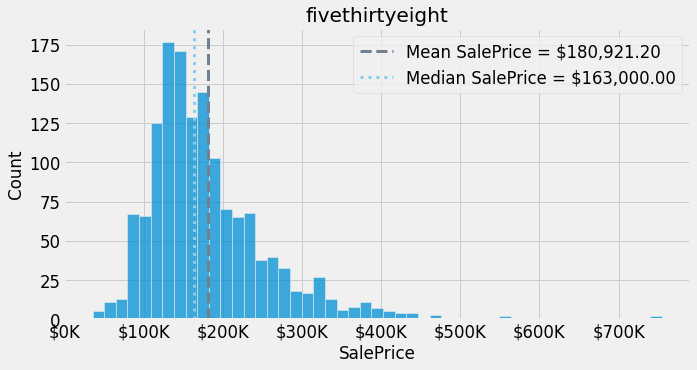

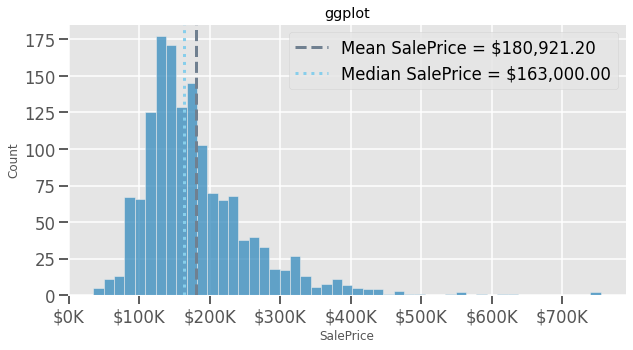

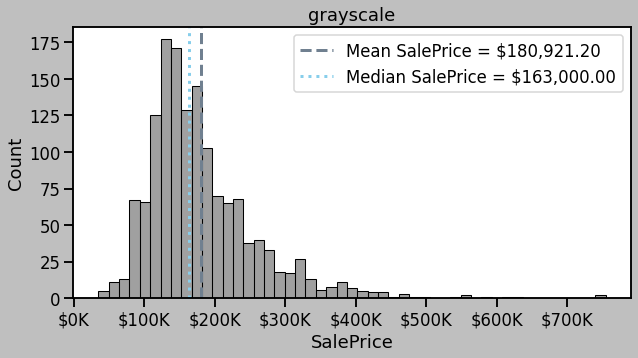

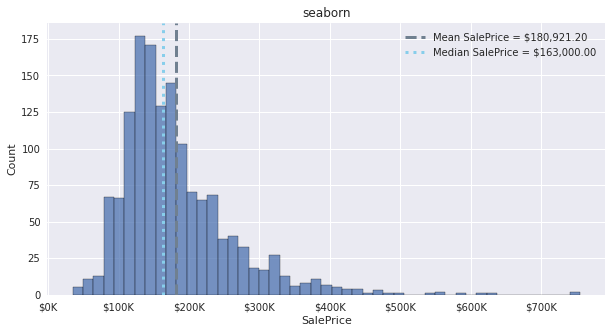

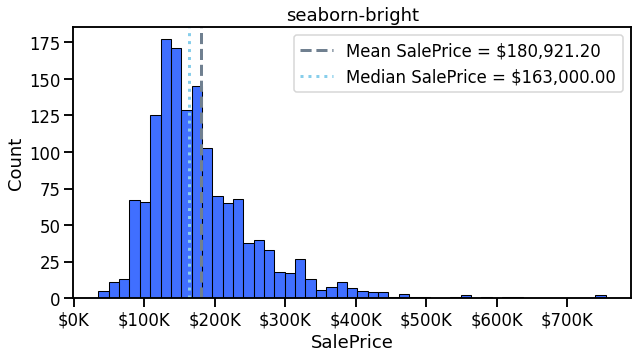

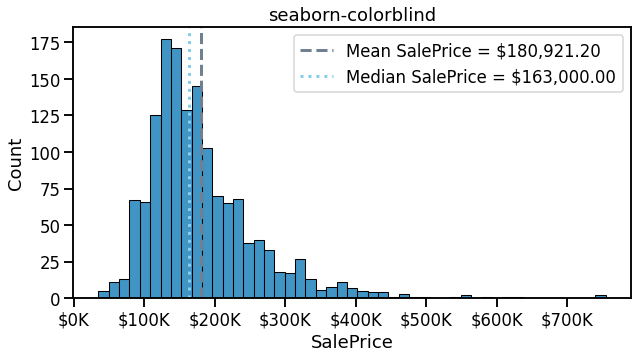

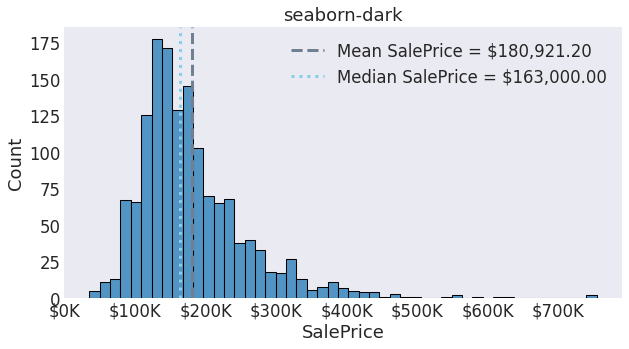

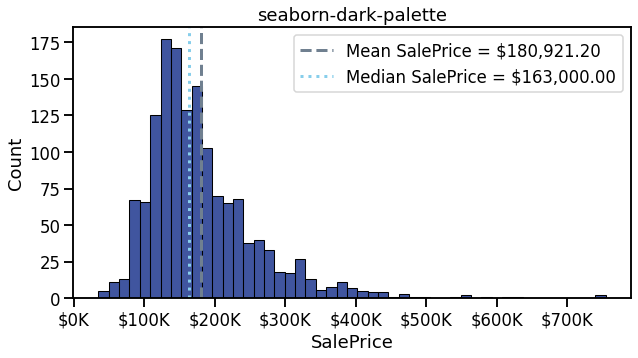

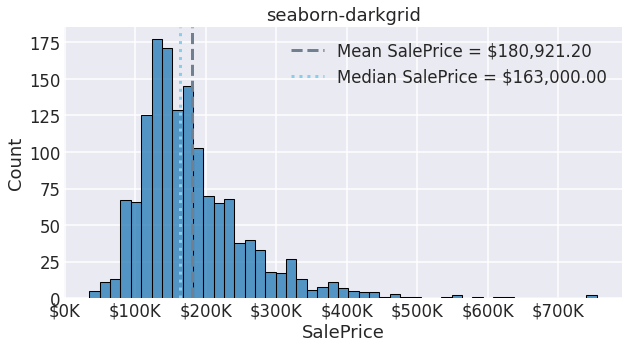

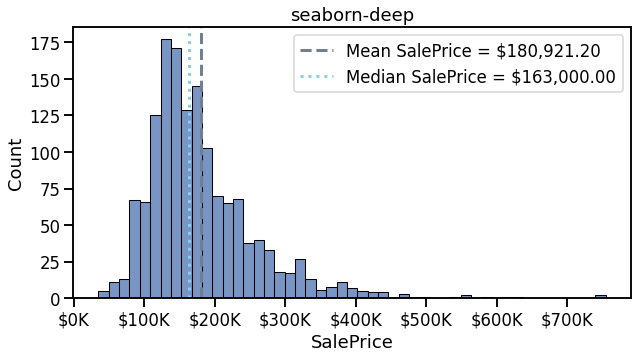

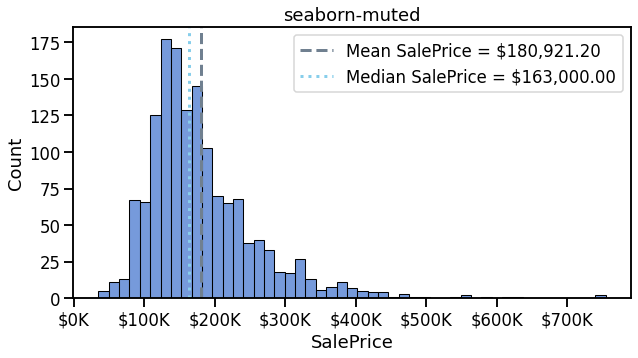

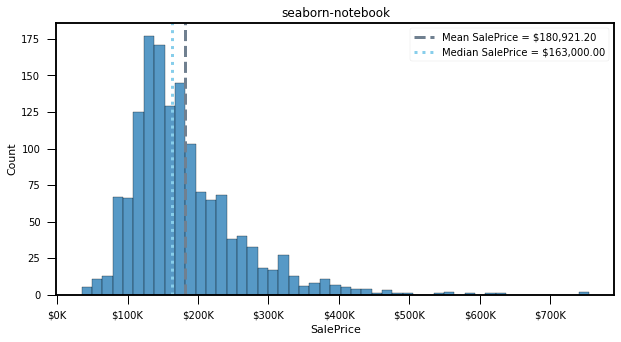

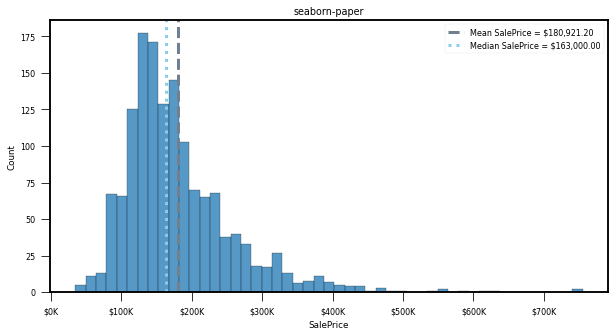

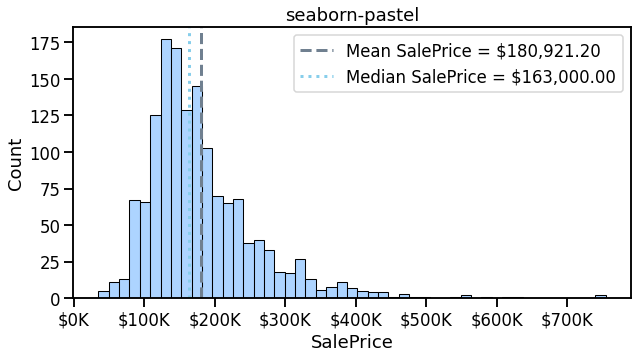

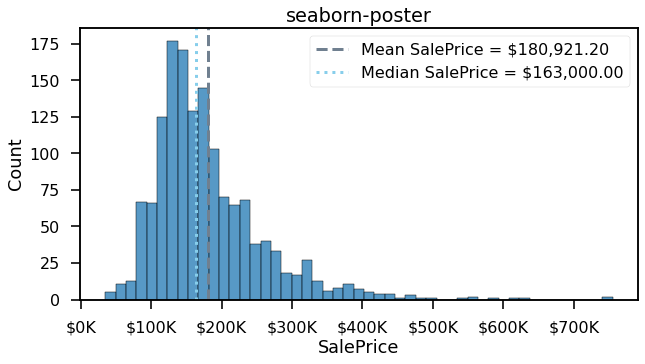

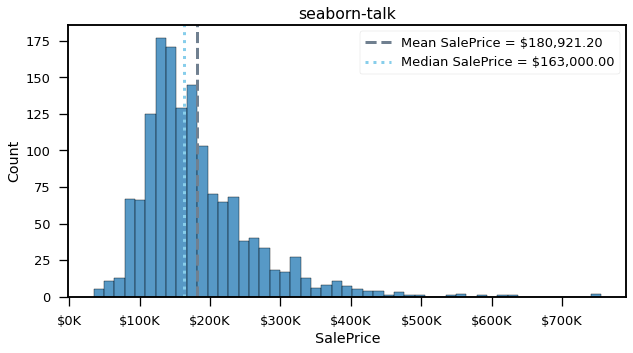

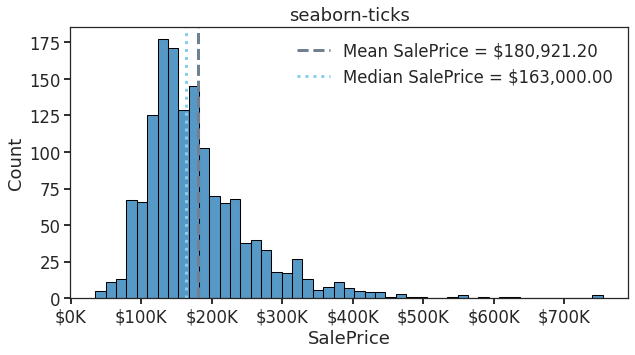

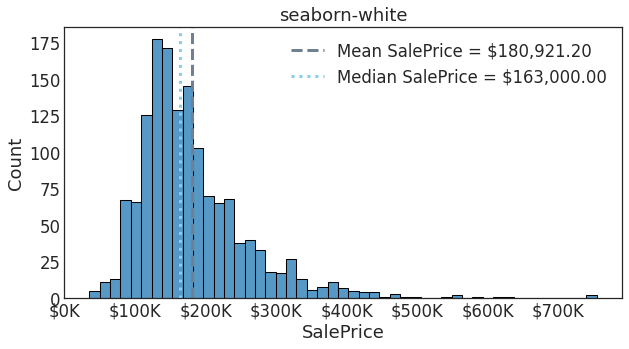

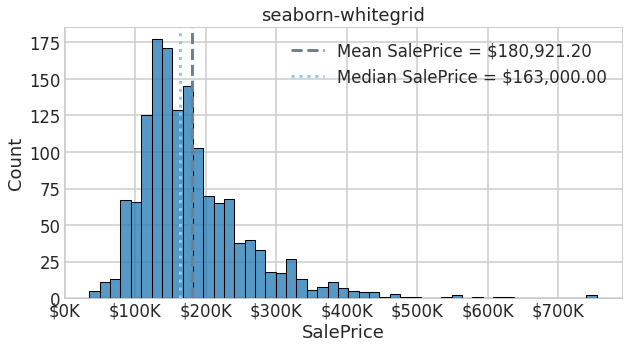

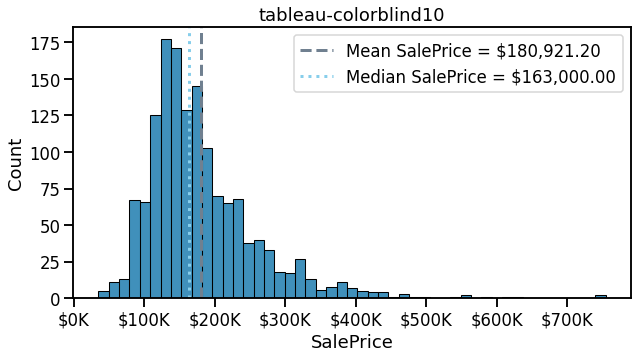

In [ ]:
## Loop to test out all styles
for style in plt.style.available:

    ## Use plt.stlye.context to temporarily use style
    with plt.style.context(style):
        fig,ax = plot_dist(df)
        ax.set_title(style)
        fig.show()
        print('\n\n')

- We can even COMBINE styles just by passing a list of style names instead of just 1!

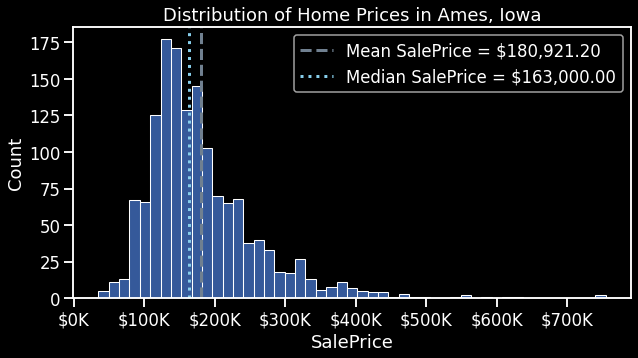

In [ ]:
## Testing combining dark_background and seaborn-muted styles 
with plt.style.context(['dark_background','seaborn-muted']):
    fix, ax = plot_dist(df)

In [ ]:
## setting my final style choices
sns.set_context('talk')
plt.style.use(['dark_background','seaborn-muted'])
plt.rcParams['font.family'] = 'serif'

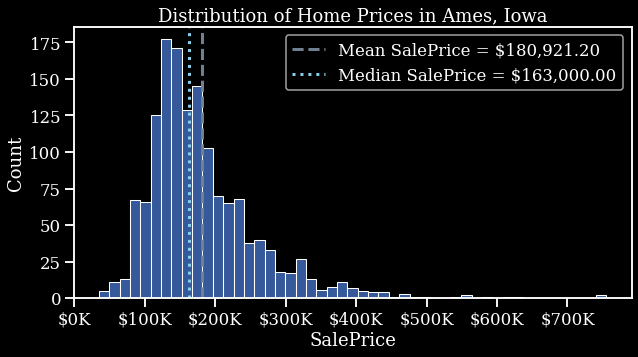

In [ ]:
## Create the (near) final version of our figure
final_fig,ax = plot_dist(df)

#### Removing some plot borders

- Let's remove the top and right borders of our visualization.
    - The 4 sides of our axis are called `Spines`
    - `ax.spines` is a special dictionary of left/right/top/bottom spine objects. 

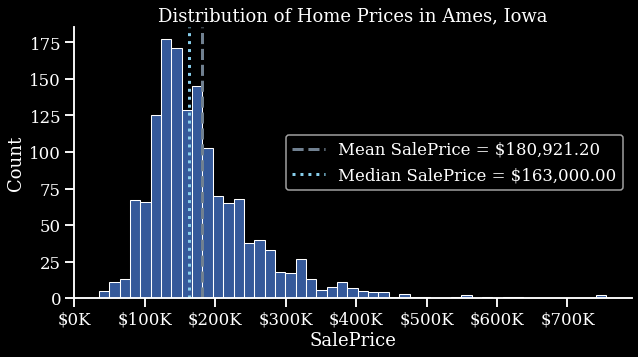

In [ ]:
fig, ax = plot_dist(df)

## removing top and right border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## repositioning final legend
ax.legend(loc='center right')

### `𝑓` Final `plot_dist` Function

In [ ]:
## Creating a BETTER version of our function with fancy price ticks
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}K"


def plot_dist(data,x='SalePrice',figsize=(10,5),format_price=True,
              despine=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=df,x=x,ax=ax)
    ax.set_title('Distribution of Home Prices in Ames, Iowa',
                 fontsize='x-large',y=1.1);


    ## Annotating mean and median
    mean_price = df[x].mean()
    ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = ${mean_price:,.2f}");

    med_price = df[x].median()
    ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = ${med_price:,.2f}");


    ## Increasing Axis Label Font Sizes
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')

    

    ## if format_price is True use our FuncFormatter
    if format_price:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    if despine:
        ## removing top and right border
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    ## add a legend        
    ax.legend()

    return fig,ax

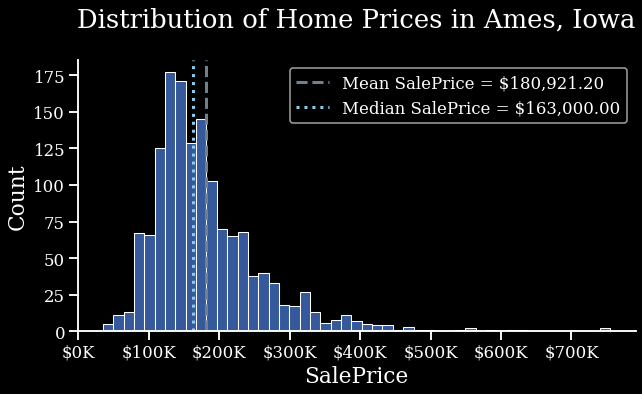

In [ ]:
## Final FIgure - Testing Final Function
best_fig,ax = plot_dist(df)


## 📚 Saving Our Final Visualization To Google Drive 

- Reminder: we have already created a `new_folder` variable that we wanted to store our images in.

- We can `plt.savefig` or `fig.savefig` to save our figure to an image file (usually a .png or a .jpg.

- We will give it the exact filename (including folder) that we want to save it as. 

- There are a couple of settings we may want to change as we save it.
    - dpi: quality of image 
    - bbox_inches: if set to "tight" auto calculate best outer edge
    - facecolor: background of the entire figure (normally transparent!)
    - pad_inches: if your title or axis label text gets cutoff

In [ ]:
## checking if any images already exist (to avoid overwriting a file)
print(new_folder)
sorted(os.listdir(new_folder))

/content/drive/MyDrive/DS-Bootcamp/Week_04/Lecture_02/Advanced_Visualizations/


['Top 10 Tallest Heroes with Power of Accelerated Healing.png',
 'Top 10 Tallest Heroes with Power of Agility.png',
 'Top 10 Tallest Heroes with Power of Durability.png',
 'Top 10 Tallest Heroes with Power of Energy Blasts.png',
 'Top 10 Tallest Heroes with Power of Flight.png',
 'Top 10 Tallest Heroes with Power of Intelligence.png',
 'Top 10 Tallest Heroes with Power of Reflexes.png',
 'Top 10 Tallest Heroes with Power of Stamina.png',
 'Top 10 Tallest Heroes with Power of Super Speed.png',
 'Top 10 Tallest Heroes with Power of Super Strength.png',
 'home-prices-in-ames.png']

In [ ]:
## Save the final figure
best_fig.savefig(new_folder+'home-prices-in-ames.png',
                  dpi=300,facecolor='black',bbox_inches='tight',pad_inches=0.2)

(-0.5, 2736.5, 1694.5, -0.5)

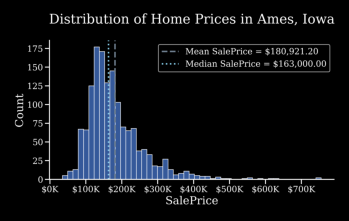

In [ ]:
## testing loading image with matplotlib - BETTER TO CHECK IN GOOGEL DRIVE!!
loaded_img = plt.imread(new_folder+'home-prices-in-ames.png',)
plt.imshow(loaded_img)
plt.axis('off')

# 🕹 🦸 Task #2: The Tallest Super Heroes (By Super Power) <a name="task2"></a>🦸‍♀️
- [🗂Click to jump to ToC ](#contents)

<img src="https://storage.googleapis.com/kaggle-datasets-images/26532/33799/5651215d143dbcf8afe85f3f57c1b284/dataset-cover.jpg?t=2018-05-14-23-16-16">

- We will be working with 2 csv's with super heroes data:
    - `'heroes_information.csv'`: their stats/general info
    - `'super_hero_powers.csv'`: collections of powers.

- We are going to find the 10 most common powers in all comics/movies/shows.

- For each of these 10 most common powers, we are going to display a bar chart of the 10 tallest heroes with those powers. 


- We are going to color-code our bars based on the Publisher. 
    - We will have to manually construct our legend to do so.

- We are going to save the images to file with appropraite file names. 

In [ ]:
## Load in the heroes and powers files
heroes =pd.read_csv(DATA_FOLDER+'heroes_information.csv',index_col=0)

powers = pd.read_csv(DATA_FOLDER+'super_hero_powers.csv')
display(heroes.head(),powers.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
## set names as index for powers df
powers = powers.set_index('hero_names')
powers

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
## Summing powers True/False will tell us how many heroes have the power
powers.sum().sort_values(ascending=False).head(20)

Super Strength         360
Stamina                289
Durability             257
Super Speed            249
Agility                242
Flight                 212
Accelerated Healing    178
Reflexes               164
Intelligence           158
Energy Blasts          147
Stealth                126
Marksmanship           119
Invulnerability        117
Longevity              113
Weapons Master         105
Telepathy               92
Enhanced Senses         89
Force Fields            86
Energy Absorption       77
Teleportation           72
dtype: int64

In [ ]:
## Save top 10 most common powers
powers_list = powers.sum().sort_values(ascending=False).head(10).index
powers_list

Index(['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility',
       'Flight', 'Accelerated Healing', 'Reflexes', 'Intelligence',
       'Energy Blasts'],
      dtype='object')

In [ ]:
##  Save first power in powers_list as power_name
power_name = powers_list[0]
print(power_name)


## Select/filter ONLY hereos with that power
powers[powers[power_name]==True]

Super Strength


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abraxas,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
## Saving selected heroes names (the index) as heroes_with_power
heroes_with_power = powers[powers[power_name]==True].index
heroes_with_power

Index(['3-D Man', 'A-Bomb', 'Abe Sapien', 'Abomination', 'Abraxas',
       'Absorbing Man', 'Agent Zero', 'Air-Walker', 'Ajax', 'Alex Mercer',
       ...
       'Weapon XI', 'Wildfire', 'Winter Soldier', 'Wolfsbane', 'Wolverine',
       'Wonder Girl', 'Wonder Man', 'Wonder Woman', 'X-23', 'Ymir'],
      dtype='object', name='hero_names', length=360)

In [ ]:
# Use the list of heroes combine with pd.Series.isin to
# make a filter for hereos with the power
filter_heroes = heroes['name'].isin(heroes_with_power)
filter_heroes

0       True
1       True
2      False
3       True
4       True
       ...  
729    False
730     True
731    False
732    False
733    False
Name: name, Length: 734, dtype: bool

In [ ]:
## save selected heroes in a new df called selected_heroes
selected_heroes = heroes[filter_heroes].copy()
selected_heroes

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
...,...,...,...,...,...,...,...,...,...,...
720,Wonder Girl,Female,blue,Demi-God,Blond,165.0,DC Comics,-,good,51.0
721,Wonder Man,Male,red,-,Black,188.0,Marvel Comics,-,good,171.0
722,Wonder Woman,Female,blue,Amazon,Black,183.0,DC Comics,-,good,74.0
725,X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,-,good,50.0


In [ ]:
## Find the 10 largest Heights and save
tallest10 = selected_heroes.sort_values('Height',ascending=False).head(10)
tallest10

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0
272,Galactus,Male,black,Cosmic Entity,Black,876.0,Marvel Comics,-,neutral,16.0
302,Groot,Male,yellow,Flora Colossus,-,701.0,Marvel Comics,-,good,4.0
718,Wolfsbane,Female,green,-,Auburn,366.0,Marvel Comics,-,good,473.0
575,Sasquatch,Male,red,-,Orange,305.0,Marvel Comics,-,good,900.0
504,Onslaught,Male,red,Mutant,No Hair,305.0,Marvel Comics,-,bad,405.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,-,neutral,855.0
576,Sauron,Male,-,Maiar,-,279.0,J. R. R. Tolkien,-,bad,-99.0
611,Solomon Grundy,Male,black,Zombie,White,279.0,DC Comics,-,bad,437.0


### 📚 Controlling Selective Coloring of Figure Elements

- We want to be able to color-code heroes according to which publisher produces their comic/media. 

>- We want the same colors to be used for the same publishers across any figures we make.

- We can use this dictionary with `.map` to get a series with color names to use (whihc we determine using Publisher.
    - `df['Publisher'].map(colors_dict)`
- Example:
```python
pub_colors = {'Marvel Comics':'blue', 
              'Dark Horse Comics':'darkgray', 
              'DC Comics':'brown'}
ax = sns.barplot(data=tallest10,x='name',y='Height',
palette = tallest10['Publisher'].map(pub_colors))
```

No handles with labels found to put in legend.


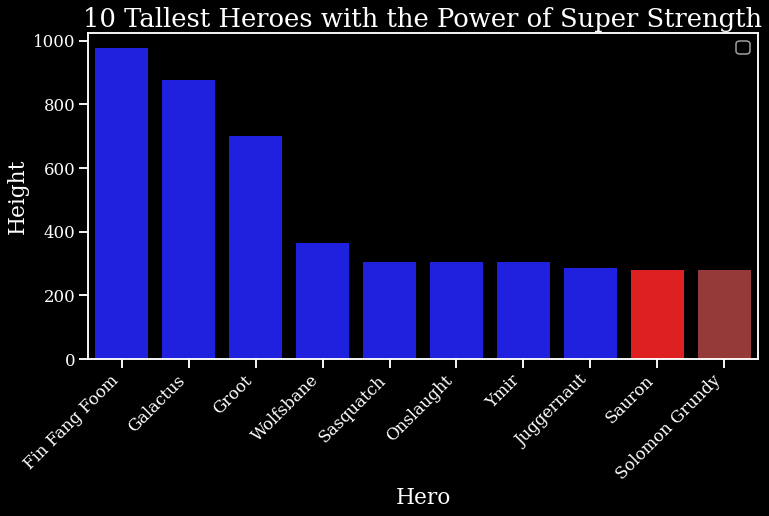

In [ ]:
## Dict of Colors to use for each publisher
pub_colors = {'Marvel Comics':'blue', 
              'Dark Horse Comics':'darkgray', 
              'DC Comics':'brown',
              'George Lucas':'green',
              'J. R. R. Tolkien':'red',
              'Image Comics':'purple'}


## make a barplot and use the pub_colors dictionary to create the palette 
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=tallest10,x='name',y='Height', ax=ax,
                 palette=tallest10['Publisher'].map(pub_colors))


## Use the power name to create a descrptive title
ax.set_title(f"10 Tallest Heroes with the Power of {power_name}",
             fontsize='x-large')

## Rotate the xlabels so they are readable
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,ha='right')


## Increasing Axis Label Font Sizes
ax.set_xlabel("Hero",
            fontsize='large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
            fontsize='large')

ax.legend();


> Using this approach, we cannot automatically add a color legend, since we determined the colors ourselves. 

- Below is a good example of finding helpful examples on the web and adapting to suit our needs, and citing the sourrce.

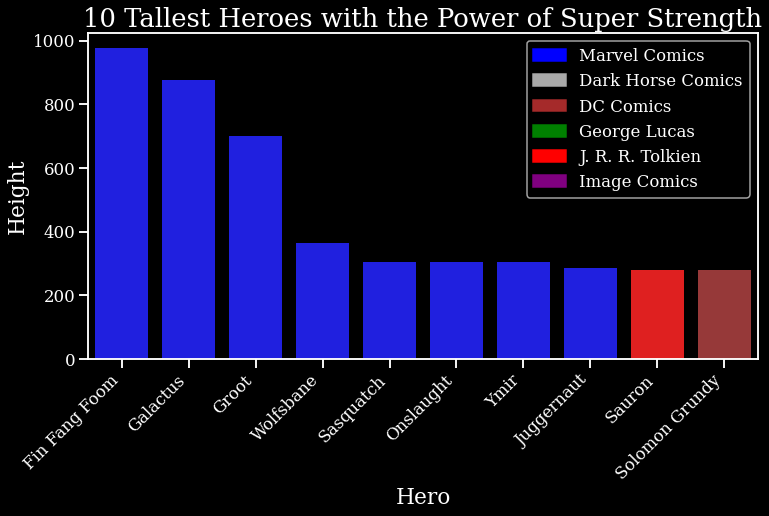

In [ ]:
# Adapted from https://moonbooks.org/Articles/How-to-manually-add-a-legend-with-a-color-box-on-a-matplotlib-figure-/
import matplotlib.patches as mpatches

## Concstruct the list of handles for the legend
handles = []
for publisher, color in pub_colors.items():
    handles.append(mpatches.Patch(color=color, label=publisher))
    

## Use ax.legend with handles=handles
ax.legend(handles=handles,bbox_to_anchor=[1,1])


## display fig to see the result.
fig

### def `plot_heroes_color_publisher` Function

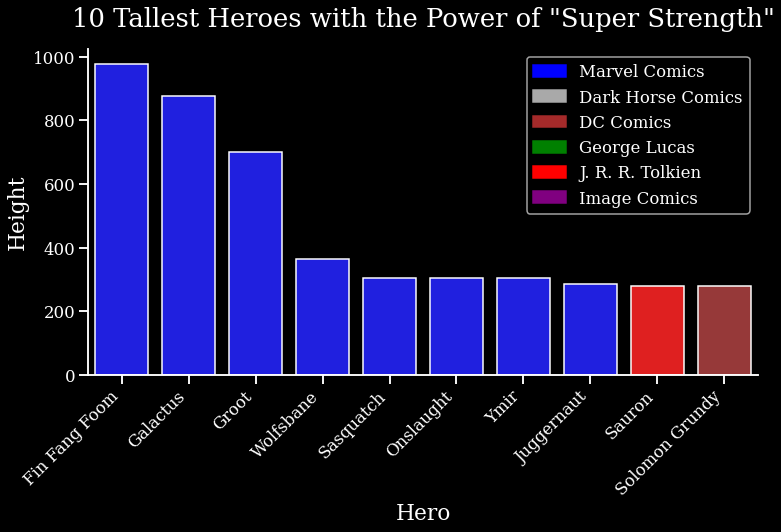

In [ ]:
## functionize our plot as plot_heroes_color_publisher
def plot_heroes_color_publisher(tallest10,figsize=(12,6), 
                                pub_colors = {'Marvel Comics':'blue', 
                                              'Dark Horse Comics':'darkgray', 
                                              'DC Comics':'brown',
                                              'George Lucas':'green',
                                              'J. R. R. Tolkien':'red',
                                              'Image Comics':'purple'},
                                despine=True, 
                                spines_to_remove=["top","right"]):
    
    fig, ax = plt.subplots(figsize=figsize)

    ## make a barplot and use the pub_colors dictionary to create the palette 
    sns.barplot(data=tallest10, x='name', y='Height',
                edgecolor='white',
                     palette=tallest10['Publisher'].map(pub_colors),ax=ax)
    
    ## Set text
    ax.set_title(f'10 Tallest Heroes with the Power of "{power_name}"',
                 fontsize='x-large', y=1.05)
    ax.set_xticklabels(ax.get_xticklabels(), 
                       rotation=45, ha='right')
    
    ## Increasing Axis Label Font Sizes
    ax.set_xlabel("Hero",
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')

    # remove spines
    if despine:
        [ax.spines[side].set_visible(False) for side in spines_to_remove]
        
    ### Below Code Adapted from https://moonbooks.org/Articles/How-to-manually-add-a-legend-with-a-color-box-on-a-matplotlib-figure-/
    ## Manually constructing legend
    import matplotlib.patches as mpatches

    handles = []
    for publisher, color in pub_colors.items():
        handles.append(mpatches.Patch(color=color, 
                                      label=publisher))
    
    ax.legend(handles=handles, 
              bbox_to_anchor=[1,1])
    

    return fig, ax



fig,ax = plot_heroes_color_publisher(tallest10)


### ✅ Future Possible Function To-Dos

- [ ] sort the legend alphabetically
- [ ] only include colors in the legend that appear in the filtered dataset
- [ ] tweak axis label sizes and distance

### ∞ Final Loop to Make Top Power Figures & Save

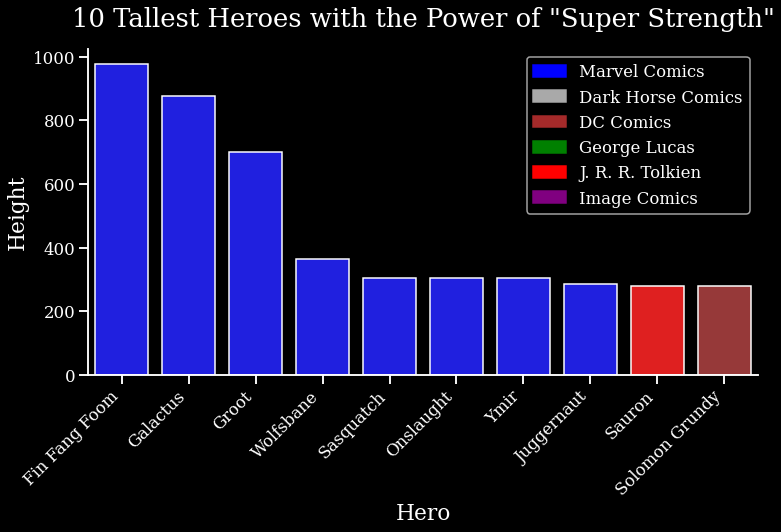

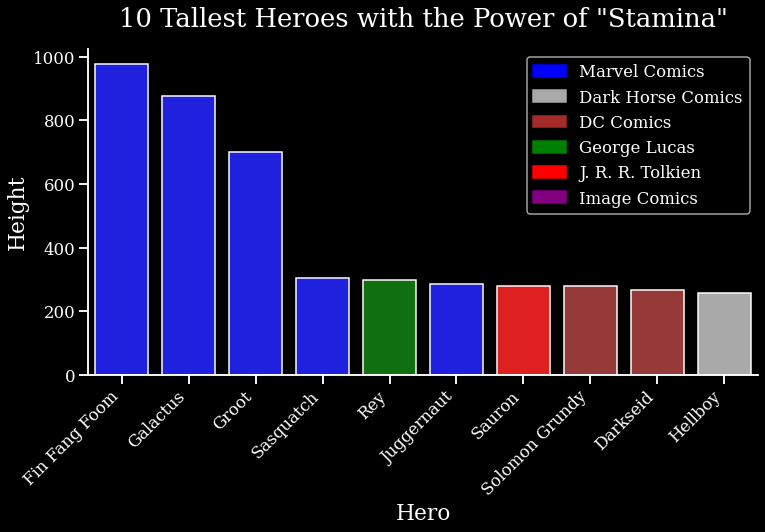

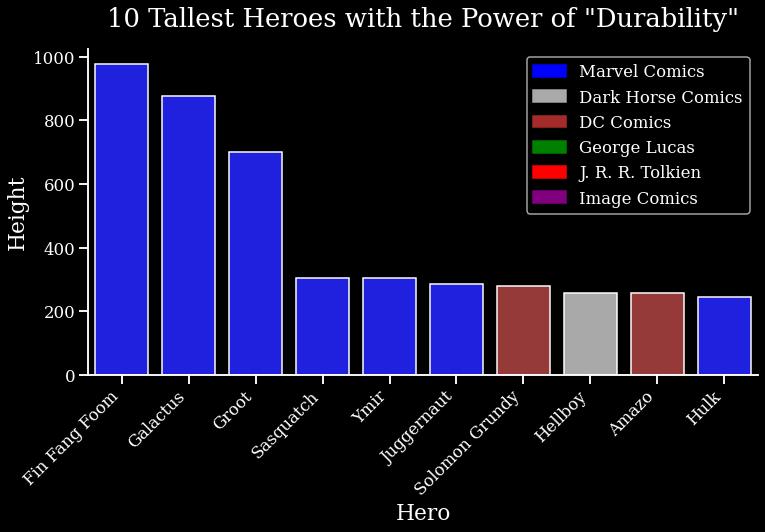

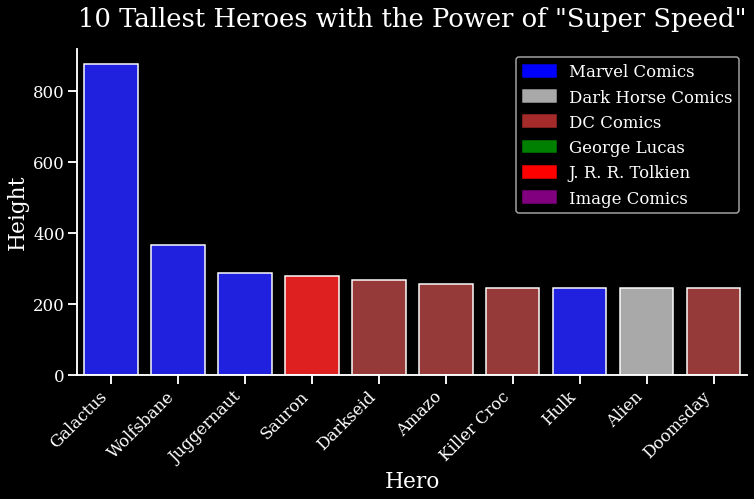

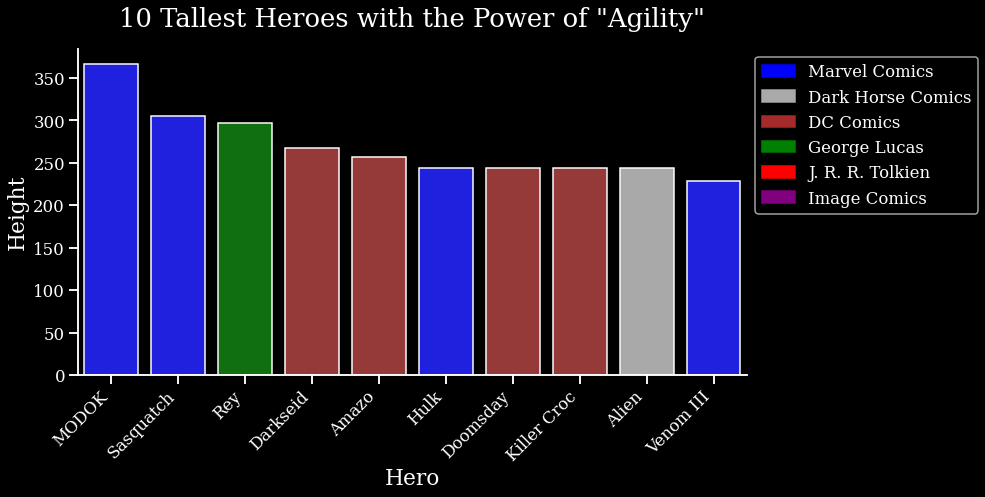

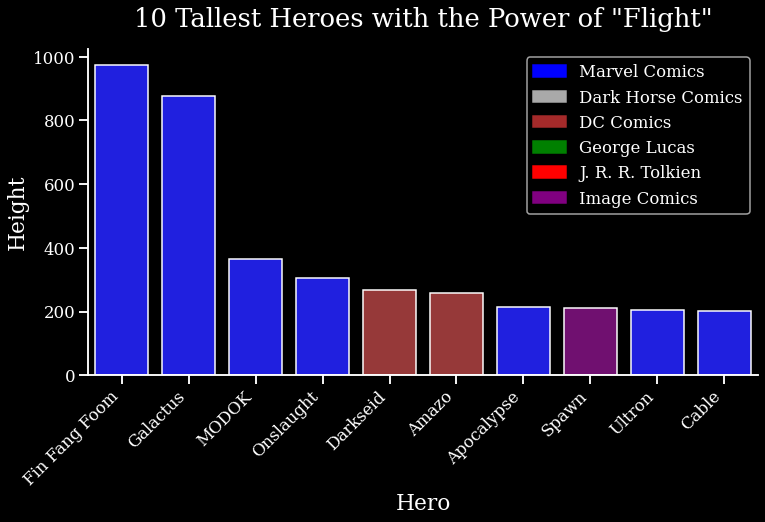

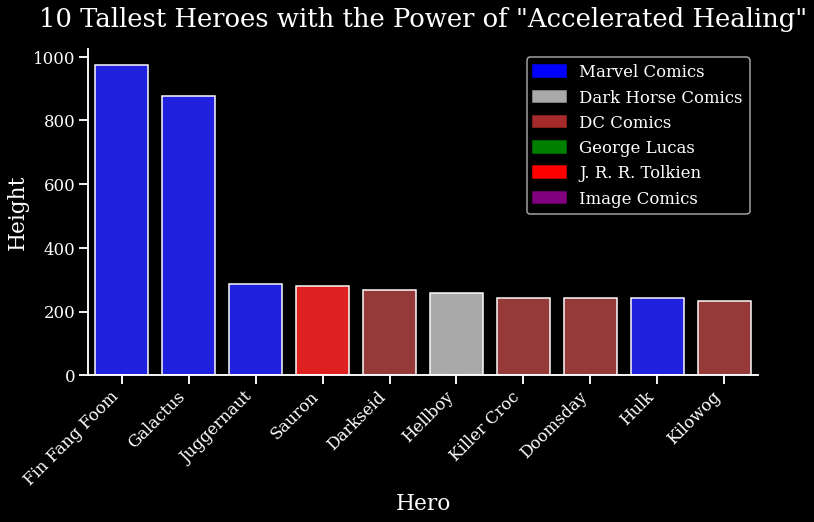

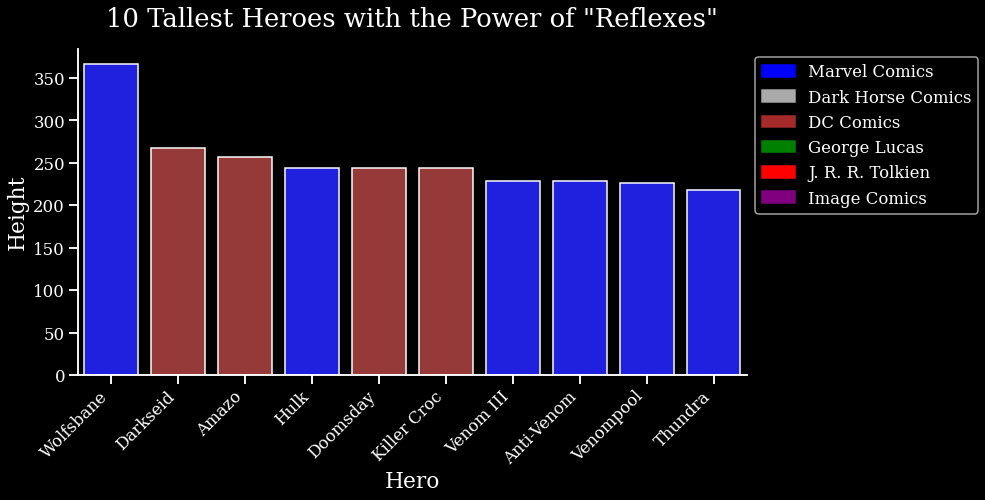

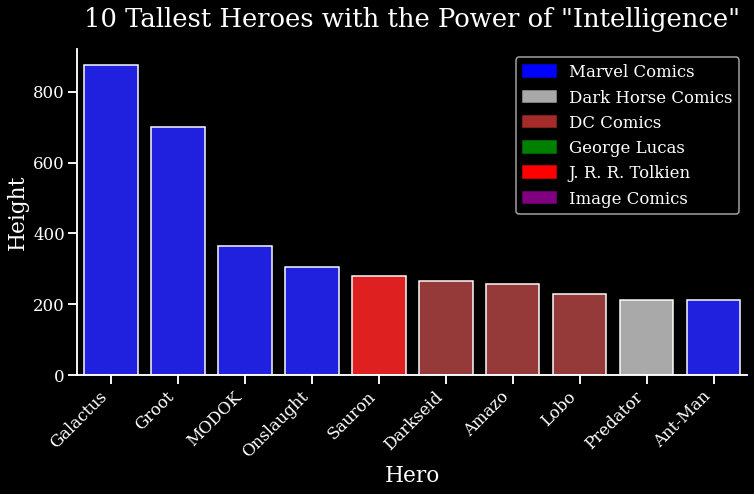

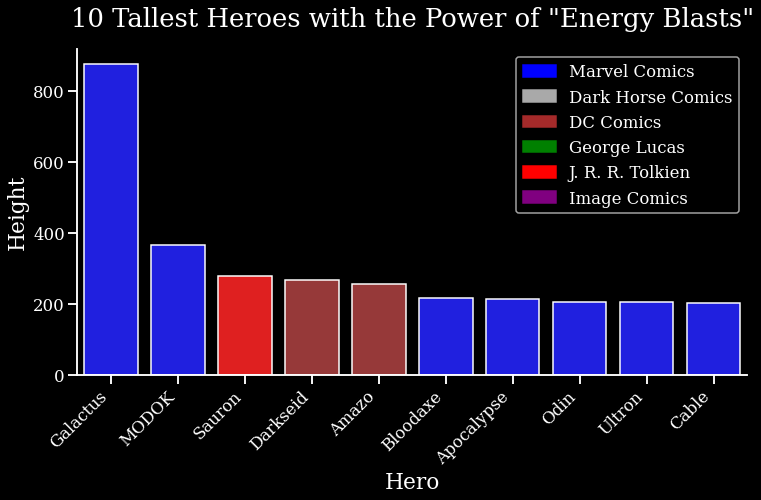

In [ ]:
# Creating a dictionary for saving my figures
FIGS = {}

## for each of the top 10 most common powers... 
powers_list = powers.sum().sort_values(ascending=False).head(10).index
for power_name in powers_list:

    ## grab the heroes that have that power and 
    heroes_with_power = powers.loc[powers[power_name]==True].index
    filter_heroes = heroes['name'].isin(heroes_with_power)

    ## slice just filtered heroes
    selected_heroes = heroes[filter_heroes]

    ## find the Tallest/Shortest heroes and plot as...bars?
    tallest10 = selected_heroes.sort_values('Height', ascending=False).head(10)

    ## since we only accounted for a few publishers, we may encounter some errors
    # using try and except to attempt to plot the data
    try:
        fig,ax = plot_heroes_color_publisher(tallest10)
        fig.show()
        fig.savefig(f"{new_folder}Top 10 Tallest Heroes with Power of {power_name}.png", 
                    dpi=300, facecolor='black', transparent=False,
                    bbox_inches='tight', pad_inches=0.2)

        ## Saving to FIGS dict
        FIGS[power_name] = fig

    ## if it errors, print what power had the error and display the unique publishers
    except:
        print(f"\n[!] Error for {power_name}")
        print('Publishers found:')
        display(tallest10['Publisher'].unique())

> Confirm we saved our figures to our new_folder on Google Drive

In [ ]:
print(new_folder)
os.listdir(new_folder)

/content/drive/MyDrive/DS-Bootcamp/Week_04/Lecture_02/Advanced_Visualizations/


['home-prices-in-ames.png',
 'Top 10 Tallest Heroes with Power of Durability.png',
 'Top 10 Tallest Heroes with Power of Stamina.png',
 'Top 10 Tallest Heroes with Power of Super Strength.png',
 'Top 10 Tallest Heroes with Power of Super Speed.png',
 'Top 10 Tallest Heroes with Power of Agility.png',
 'Top 10 Tallest Heroes with Power of Flight.png',
 'Top 10 Tallest Heroes with Power of Accelerated Healing.png',
 'Top 10 Tallest Heroes with Power of Reflexes.png',
 'Top 10 Tallest Heroes with Power of Intelligence.png',
 'Top 10 Tallest Heroes with Power of Energy Blasts.png']

In [ ]:
# raise Exception("Stop here for primary in-class activity!")

# APPENDIX <a name='Appendix'></a>
- [🗂Click to jump to ToC](#contents)

### Seaborn Themes/Contexts/Colorpalette

- https://seaborn.pydata.org/api.html#themeing
- https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

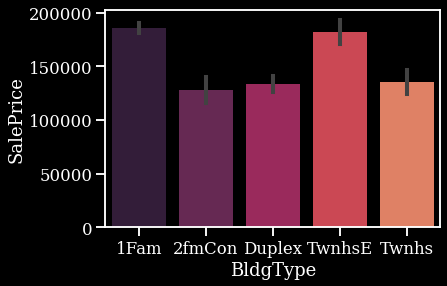

In [ ]:
palette = sns.color_palette('rocket')
sns.barplot(data=df,x='BldgType',y='SalePrice',palette=palette)

## Annotations

- https://jessica-miles.medium.com/adding-annotations-to-visualizations-using-matplotlib-279e9c770baa
- https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

In [ ]:
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRQpH02vlgxAwATTUhJBC0MGiciSz-vUPenWNbrkVH4ijb12NXK-4ut0jLqbANnBgRUo36ZAXDfeQKa/pub?output=csv')
df2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:

df2.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

(0.0, 88.51226782226563)

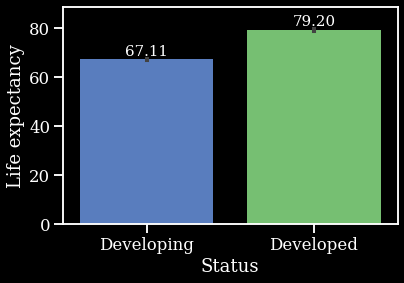

In [ ]:
ax = sns.barplot(data=df2, x='Status',y='Life expectancy')
## Adapted from: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, #x-coordinate: 
                    bar.get_height()), #y-coordinate:
                 ha='center', va='center', # text horizontal and vertical alignment
                   size=15, fontfamily='serif',
              xytext=(0, 8), ## free space to be left to make graph pleasing: (0, 8)
                   textcoords='offset points')
  
## Making the y-limit 5-units higher to allow for annotation  
ax.set_ylim(top=ax.get_ylim()[-1]+5)

## Multiple Subplots with Different Figure Sizes


- Plot two subplots: large histogram and small boxplot
    - Give the distribution much more width than the bar plot.
        - Using gridspec with matplotlib: 
            - https://matplotlib.org/stable/tutorials/intermediate/gridspec.html
            - https://stackoverflow.com/questions/34268742/how-to-use-gridspec-with-subplots/34269388

#### Example of Default Subplots

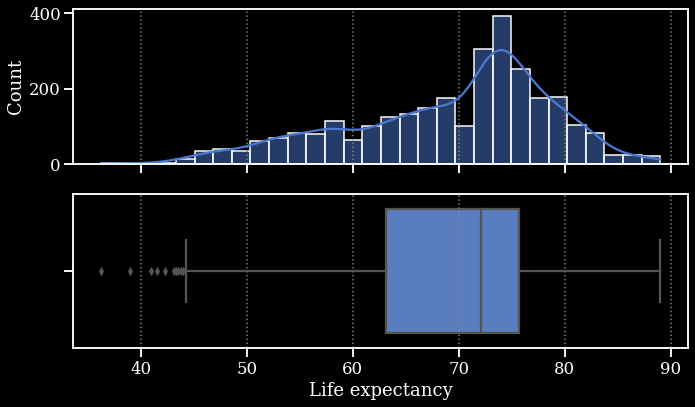

In [ ]:
## Visualize Distributions and Means
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10,6))

sns.histplot(data=df2,x='Life expectancy',kde=True,ax=axes[0])
sns.boxplot(data=df2, x='Life expectancy' ,ax=axes[1])

[a.grid(axis='x',ls=':',color='gray') for a in axes];
fig.tight_layout()

#### Using `gridspec_kws` to set different proportions

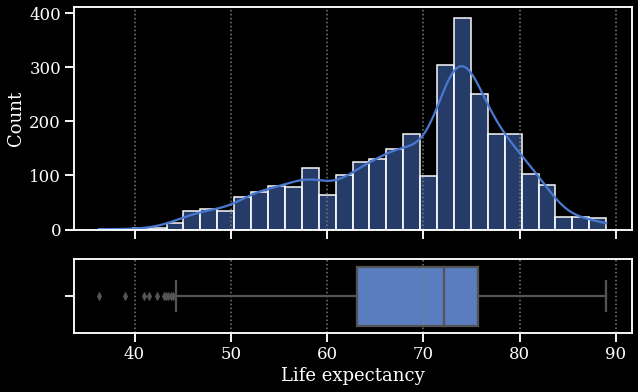

In [ ]:
## Visualize Distributions and Means
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10,6),
                         gridspec_kw={'height_ratios':[0.75,0.25]},)

sns.histplot(data=df2,x='Life expectancy',kde=True,ax=axes[0])
sns.boxplot(data=df2, x='Life expectancy' ,ax=axes[1])

[a.grid(axis='x',ls=':',color='gray') for a in axes];
# [a.set(frame_on=False) for a in axes];

# fig.frameon(False)

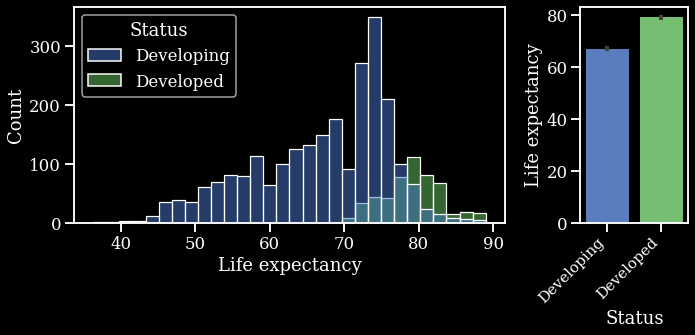

In [ ]:
## Visualize Distributions and Means
fig, axes = plt.subplots(ncols=2, figsize=(10,5),
                         gridspec_kw={'width_ratios':[0.8,0.2]})

sns.histplot(data=df2,x='Life expectancy',hue='Status' ,ax=axes[0])
sns.barplot(data=df2, y='Life expectancy',x='Status' ,ax=axes[1],ci=68)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize='small',
                        ha='right')
# axes[1].legend(handles=axes[0].get_legend().get_handles(),bbox_to_anchor=[1,1])
fig.tight_layout()


## Transforming DataFrames to Leverage Seaborn



### Example: Cats Dogs Boxplot

In [ ]:
df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXqVI5_p-kjmdG6Ww9mxHJfB_rM3VlLIbIk6HGCWgy1b0Fy3i9AscZm2JHU9re5Q/pub?output=xlsx')
df

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1828.0,59.5,1088.0,44.1,807.0,1.7,1410.0,27.4,501.0,2.5,1252.0
1,Arizona,2515.0,59.5,1497.0,40.1,1008.0,1.8,1798.0,29.6,743.0,1.9,1438.0
2,Arkansas,1148.0,62.4,716.0,47.9,550.0,2.0,1097.0,30.6,351.0,2.3,810.0
3,California,12974.0,52.9,6865.0,32.8,4260.0,1.6,6687.0,28.3,3687.0,1.9,7118.0
4,Colorado,1986.0,61.3,1217.0,42.5,845.0,1.6,1349.0,32.3,642.0,1.9,1191.0
5,Connecticut,1337.0,54.4,728.0,28.3,379.0,1.3,507.0,31.9,427.0,1.9,796.0
6,Delaware,334.0,56.6,189.0,33.7,113.0,1.4,163.0,33.7,113.0,1.7,187.0
7,District of Columbia,287.0,21.9,63.0,13.1,38.0,1.1,42.0,11.6,33.0,1.9,63.0
8,Florida,7609.0,54.4,4138.0,35.7,2718.0,1.5,4210.0,27.3,2079.0,2.1,4375.0
9,Georgia,3798.0,55.1,2093.0,40.1,1522.0,1.6,2479.0,27.3,1037.0,2.1,2162.0


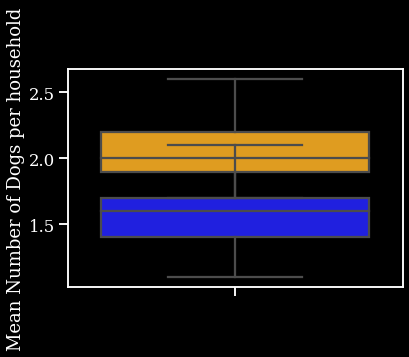

In [ ]:
##  The problem
sns.boxplot(data=df, y='Mean Number of Cats',color='orange')
sns.boxplot(data=df, y='Mean Number of Dogs per household',color='blue')

<Figure size 864x360 with 0 Axes>

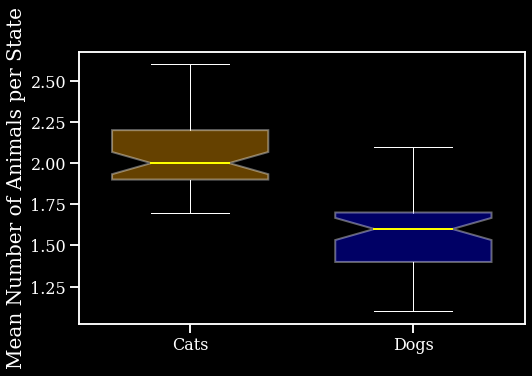

In [ ]:
## Preivously shared solution - modified for black background
## new dict for setting white lines
white_lines = dict(color='white')

plt.figure(figsize = (12, 5))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([df['Mean Number of Cats'],df['Mean Number of Dogs per household']],
           notch = True,
           labels=['Cats', 'Dogs'],
           widths = .7,
           patch_artist=True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='white', facecolor = 'blue', alpha = .4),
           whiskerprops=white_lines,
           flierprops=white_lines,
           capprops=white_lines
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('orange')
plt.ylabel('Mean Number of Animals per State', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

- Using pd.melt to turn multiple columns into stacked rows.
    - https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [ ]:
## melt dataframe, keep only Location as id, and cats/dogs as values
melted = pd.melt(df, id_vars='Location',value_vars= ['Mean Number of Cats','Mean Number of Dogs per household'])
melted.sort_values("Location")

,Location,variable,value
0,Alabama,Mean Number of Cats,2.5
49,Alabama,Mean Number of Dogs per household,1.7
1,Arizona,Mean Number of Cats,1.9
50,Arizona,Mean Number of Dogs per household,1.8
2,Arkansas,Mean Number of Cats,2.3
...,...,...,...
46,West Virginia,Mean Number of Cats,2.2
96,Wisconsin,Mean Number of Dogs per household,1.4
47,Wisconsin,Mean Number of Cats,1.9
48,Wyoming,Mean Number of Cats,1.9


In [ ]:
## give the new columns better name
plot_df = pd.melt(df, id_vars=['Location'],
                  value_vars= ['Mean Number of Cats','Mean Number of Dogs per household'],
                  var_name='Pet Type',
                  value_name='Mean Number per household')
plot_df

,Location,Pet Type,Mean Number per household
0,Alabama,Mean Number of Cats,2.5
1,Arizona,Mean Number of Cats,1.9
2,Arkansas,Mean Number of Cats,2.3
3,California,Mean Number of Cats,1.9
4,Colorado,Mean Number of Cats,1.9
...,...,...,...
93,Virginia,Mean Number of Dogs per household,1.6
94,Washington,Mean Number of Dogs per household,1.7
95,West Virginia,Mean Number of Dogs per household,1.8
96,Wisconsin,Mean Number of Dogs per household,1.4


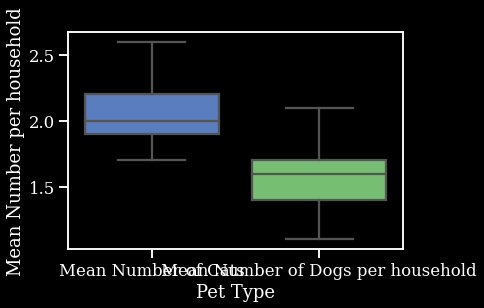

In [ ]:
ax = sns.boxplot(data=plot_df, x='Pet Type', y='Mean Number per household')#,notch=True)

In [ ]:
## Replacing long names with just Cats and Dogs
rename_map = {"Mean Number of Cats":"Cats","Mean Number of Dogs per household":"Dogs"}
plot_df['Pet'] = plot_df['Pet Type'].replace(rename_map)
plot_df

,Location,Pet Type,Mean Number per household,Pet
0,Alabama,Mean Number of Cats,2.5,Cats
1,Arizona,Mean Number of Cats,1.9,Cats
2,Arkansas,Mean Number of Cats,2.3,Cats
3,California,Mean Number of Cats,1.9,Cats
4,Colorado,Mean Number of Cats,1.9,Cats
...,...,...,...,...
93,Virginia,Mean Number of Dogs per household,1.6,Dogs
94,Washington,Mean Number of Dogs per household,1.7,Dogs
95,West Virginia,Mean Number of Dogs per household,1.8,Dogs
96,Wisconsin,Mean Number of Dogs per household,1.4,Dogs


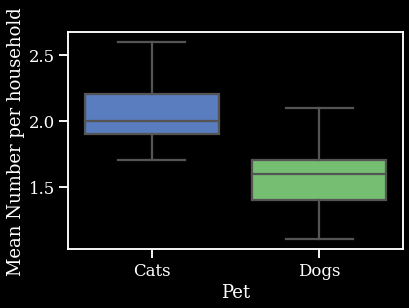

In [ ]:
ax = sns.boxplot(data=plot_df, x='Pet', y='Mean Number per household' )#,notch=True)

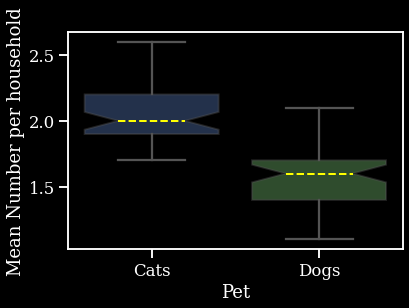

In [ ]:
sns.boxplot(data=plot_df, x='Pet', y='Mean Number per household',notch=True,
            medianprops= dict(linestyle='--', linewidth=2, color='Yellow'),
            boxprops = dict(linestyle='-', linewidth=2,  alpha = .4))